# Project: Investigate a Dataset - Medical Appointment No Shows Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Tools used fo the Analysis:**
1. Python 3.6 version
2. Libraries: Numpy, Pandas, Seaborn, and Matplotlib.

### Dataset Description 
For this project, you can find this dataset on Kaggle, [Right here](https://www.kaggle.com/joniarroba/noshowappointments).
The dataset contains 110.527 medical appointments with the aim of investigating whether or not patients show-up to their appoinments.

**There are 14 variables associated with this dataset:**

**1. `PatientId`: Id of the patient.**

**2. `AppointmentID`: Id of each appointment.**

**3. `Gender`: Male or Female.**

**4. `ScheduledDay`: Day of scheduled appointment.**

**5. `AppointmentDay`: Day which any patient asked to register an appointment.**

**6. `Age`: How old is the patient.**

**7. `Neighbourhood`: Where the appointment takes place.**

**8. `Scholarship`: True or False, Bolsa Familia Program.** "The program attempts to both reduce short-term poverty by direct cash transfers and fight long-term poverty by increasing human capital among the poor through conditional cash transfers." You can find more information. [Right here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).

**9. `Hipertension`: True or False.**

**10. `Diabetes`: True or False.**

**11. `Alcoholism`: True or False.**

**12. `Handcap`: True or False.**

**13. `SMS_received`: Reminding of 1 or more messages sent to the patient.**

**14. `No-show`: True or False.**


### Question(s) for Analysis
> The questions for the analysis are the following:

**1: What percentage of people attended to the scheduled appointment?**

**2: May age factor be considered whether or not the patients will attend to their scheduled appointment? Do older people or younger people attend to their scheduled appointment?**

**3: May the gender factor be considered whether or not the patients will attend to their scheduled appointment? Do male or female gender attend to their scheduled appointment?**

**4: Which days of the week do patients attend their scheduled appointment the most?**

**5: What factors are important to know in order to predict if a patient will show up for their scheduled appointment?**

In [1]:
# Importing all packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Checking the first rows 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 1. Identifying Format Issues

In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Seems that there is no null values. 

> ScheduledDay and AppointmentDay have an object data type and should be date type.

> No-Show have an object data type.

> We can change column labels to lower case for practical reasons.

In [4]:
df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

> Notice each appointment day seems that has been registered at the same time. 

#### 2. Identifying Null Values

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> The are more values than True or False in Handcap

In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> It appears that there is no null values. However, let's dig in further.

In [9]:
df[df['Age'] <= 0].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No


> Note that there are 3540 row with Ages <= 0. 

#### 3: Identifying Duplicates

In [10]:
df.duplicated().sum()

0

> It seems that there are no duplicates.


### Data Cleaning

**Things to be Cleaned:**

#### 1. Format Issues:

In [38]:
# First, let's change columns labels to lower case for practical reasons.

def col_fix(label):
    """The function changes column labels to lowercase and changes '-' to '_'."""
    if 'Day' in label:  # Changing the columns to "scheduled_day and appointment_day"
        label = (label[:-3] + '_' + label[-3:])  
    elif 'I' in label: # Changing the columns to "patient_id and appointment_id"
        label = (label[:-2] + '_' + label[-2:]) 
    label = label.lower().replace('-','_') # In order to change "no_show"
    return label
    
df.rename(columns = lambda label: col_fix(label), inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [12]:
# Second, let's change some spelling error in the column labels and improve data consistency.
df.rename(columns={'neighbourhood':'neighborhood', 'handcap':'handicap', 'hipertension':'hypertension'}, inplace=True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# Changing no_show values to numeric datatype
df['no_show'] = df['no_show'].map(dict(Yes=1, No=0))
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [14]:
df.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

#### Null Values: 

> Seems that there are null values. However, let's dig in further.

In [15]:
df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,0


In [16]:
df = df[df.age >= 0]
df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [17]:
# There are Zero values. Let's dig in further.
print("Unique Age Values are:{}".format(np.sort(df.age.unique())))

Unique Age Values are:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [18]:
zero_values = df[df['age'] == 0]
zero_values.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,0
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,0
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,0
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,0
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,0


In [19]:
zero_values.iloc[:, 7:12].sum()

scholarship     52
hypertension     0
diabetes         0
alcoholism       0
handicap         1
dtype: int64

> We are asumming that these patients are babies with 0 Age. Because there are not true values on Hipertension, Diabetes, and Alcoholism.

In [20]:
# Handicap column have more values than true or false.
df.query('handicap >=3').sample(5)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
2214,2.754718e+12,5640760,M,2016-04-29T11:22:20Z,2016-04-29T00:00:00Z,55,DO QUADRO,0,0,0,0,3,0,0
28892,6.656653e+13,5652894,M,2016-05-03T10:48:26Z,2016-05-04T00:00:00Z,15,ROMÃO,0,0,0,0,3,0,0
98538,4.972463e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,SÃO PEDRO,0,0,0,0,4,0,0
104927,3.995198e+12,5734981,M,2016-05-24T16:35:44Z,2016-06-01T00:00:00Z,70,ANDORINHAS,0,0,0,1,3,0,0
81320,3.616644e+13,5658796,M,2016-05-04T11:56:58Z,2016-05-20T00:00:00Z,7,BONFIM,0,0,0,0,3,0,1


In [21]:
df = df[df.handicap <= 1]
df['handicap'].value_counts()

0    108285
1      2042
Name: handicap, dtype: int64

> In the data description says that there are only True or False values in Handicap. So I proceeded to remove it from the dataset, assuming that this is an error.

In [22]:
# We have our cleaned data
df.to_csv('no_show_df_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### 1: What percentage of people attended to the appointment?

In [23]:
df_cleaned = pd.read_csv('no_show_df_cleaned.csv')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110327 entries, 0 to 110326
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110327 non-null  float64
 1   appointment_id   110327 non-null  int64  
 2   gender           110327 non-null  object 
 3   scheduled_day    110327 non-null  object 
 4   appointment_day  110327 non-null  object 
 5   age              110327 non-null  int64  
 6   neighborhood     110327 non-null  object 
 7   scholarship      110327 non-null  int64  
 8   hypertension     110327 non-null  int64  
 9   diabetes         110327 non-null  int64  
 10  alcoholism       110327 non-null  int64  
 11  handicap         110327 non-null  int64  
 12  sms_received     110327 non-null  int64  
 13  no_show          110327 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


In [24]:
# Changing data types of scheduled_day, appointment_day.
date_columns = ['scheduled_day', 'appointment_day']
for column in date_columns:
    df_cleaned[column] = pd.to_datetime(df_cleaned[column])

0    88049
1    22278
Name: no_show, dtype: int64


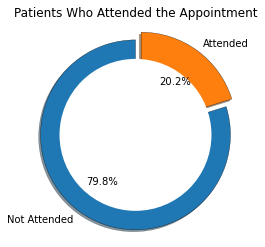

In [25]:
slices = df_cleaned['no_show'].value_counts()
print(slices)
labels = ["Not Attended", "Attended"]
explode = [0, 0.1]
plt.style.use('seaborn-notebook')
plt.pie(slices, labels=labels, explode=explode, shadow=True, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title("Patients Who Attended the Appointment")
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
fig.set_size_inches(4,4)
plt.show()

> Looks like the 20.2% of patients attended to their appointments.

### 2: May age factor be considered whether or not the patients will attend to their scheduled appointment? Do older people or younger people attend to their scheduled appointment?

In [26]:
# With the aim of analyzing the age column, we are going to create 4 bins with the labels: 'young', 'middle', 'aged', 'old'.
df_cleaned['age_bins'] = pd.cut(df_cleaned['age'], bins=5, labels=('< 23', '24-46', '47-69', '70-92', '> 93'))
df_cleaned.sample(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_bins
66632,2.859114e+14,5439768,F,2016-03-07 16:37:08+00:00,2016-05-12 00:00:00+00:00,76,JARDIM CAMBURI,0,0,0,0,0,1,0,70-92
73292,8.923293e+12,5684609,F,2016-05-11 08:51:51+00:00,2016-05-12 00:00:00+00:00,62,FRADINHOS,1,1,1,0,0,0,0,47-69
28002,1.243483e+11,5666286,F,2016-05-05 16:22:13+00:00,2016-05-12 00:00:00+00:00,48,RESISTÊNCIA,0,0,0,0,0,1,0,47-69


In [27]:
age_group = df_cleaned.groupby(['gender', 'age_bins', 'age'], as_index=False)['no_show'].sum() # sum() beacuse we are only interested on people who attended.
age_factor = age_group[age_group['no_show']>=1]
age_factor

,gender,age_bins,age,no_show
0,F,< 23,0,319.0
1,F,< 23,1,202.0
2,F,< 23,2,111.0
3,F,< 23,3,143.0
4,F,< 23,4,139.0
...,...,...,...,...
916,M,70-92,92,3.0
1020,M,> 93,93,4.0
1021,M,> 93,94,2.0
1022,M,> 93,95,2.0


Text(0.5, 1.0, 'Patients Who Attended By Age Group and Gender')

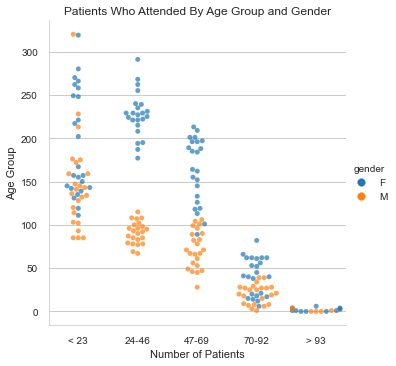

In [28]:
# Plotting categorical scatter plot
sns.set_style("whitegrid")
sns.catplot(x="age_bins", y="no_show", hue="gender", kind="swarm", alpha=0.7, data=age_group)
plt.xlabel("Number of Patients")
plt.ylabel("Age Group")
plt.title("Patients Who Attended By Age Group and Gender")

> It seems that people within the age of 0 to 69 years old are more likely to attend to their appointment.

### 3: May the gender factor be considered whether or not the patients will attend to their scheduled appointment? Do male or female gender attend to their scheduled appointments?

In [29]:
attended = df_cleaned[df_cleaned['no_show']==1]
attended.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_bins
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,< 23
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,24-46
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1,24-46
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1,24-46
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,1,24-46


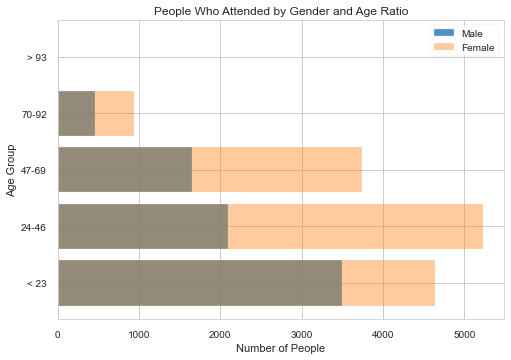

In [30]:
gender_age = attended.groupby(['gender', 'age_bins'], as_index=False)['no_show'].count()
female_gender = gender_age.iloc[:5, 1:3]
male_gender = gender_age.iloc[5:10,1:3]
plt.barh(male_gender['age_bins'], male_gender['no_show'], label="Male", alpha=0.8)
plt.barh(female_gender['age_bins'], female_gender['no_show'], label="Female", alpha=0.4)
plt.xlabel("Number of People")
plt.ylabel("Age Group")
plt.legend()
plt.title("People Who Attended by Gender and Age Ratio")
plt.show()

Text(0.5, 1.0, 'People Who Attended by Gender Ratio')

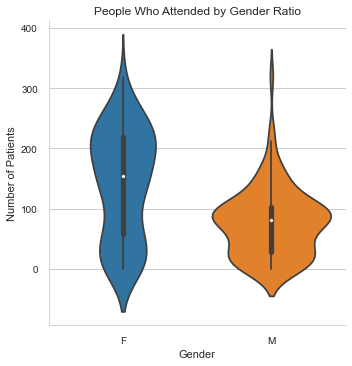

In [31]:
sns.catplot(x="gender", y="no_show", kind="violin", data=age_group)
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("People Who Attended by Gender Ratio")

> Seems that the distribution is more inclined to female gender in order to attend their appointment. Especially in the age within 24-46.

### 4: Which days of the week do patients attend their scheduled appointment the most?

In [32]:
# We will analyze the scheduled_day and appointment_day separately
attended['s_weekday'] = attended['scheduled_day'].dt.day_name()
attended['a_weekday'] = attended['appointment_day'].dt.day_name()
attended.sample(1)

/opt/miniconda3/envs/ud_projects/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/miniconda3/envs/ud_projects/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_bins,s_weekday,a_weekday
51967,1.632977e+10,5695374,F,2016-05-13 10:05:24+00:00,2016-05-20 00:00:00+00:00,18,SANTA MARTHA,0,0,0,0,0,0,1,< 23,Friday,Friday


Text(0.5, 1.0, 'People Who Attended on Scheduled Days')

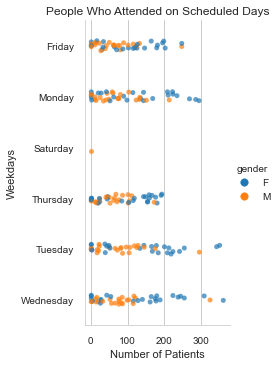

In [33]:
# Placing data by gender scheduled_day
week_day = attended.groupby(['s_weekday', 'a_weekday', 'gender', 'age_bins'], as_index=False)['no_show'].sum()
scheduled_weekdays = week_day.iloc[:, :3]
week_day1 = week_day[week_day['no_show']>= 1]
week_day1
sns.catplot(x="no_show", y="s_weekday", hue="gender", aspect=.7, alpha=0.7, kind="strip", data=week_day1)
fig.set_size_inches(5,5)
plt.xlabel("Number of Patients")
plt.ylabel("Weekdays")
plt.title("People Who Attended on Scheduled Days")

Text(0.5, 1.0, 'People Who Attended on Appointment Days')

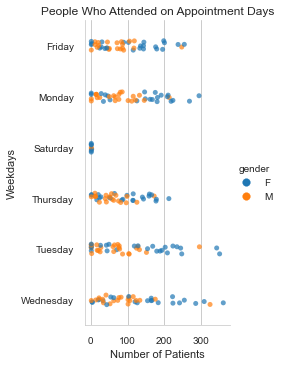

In [34]:
sns.catplot(x="no_show", y="a_weekday", hue="gender", aspect=.7, alpha=0.7, kind="strip", data=week_day1)
fig.set_size_inches(5,5)
plt.xlabel("Number of Patients")
plt.ylabel("Weekdays")
plt.title("People Who Attended on Appointment Days")

> In the visualization we can see that Mondays, Tuesdays, and Wednesdays are the days where patients attend their scheduled or appointment dates the most.


### 5: What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

Text(0.5, 1.0, 'People Who Attended by Factor and Age Group')

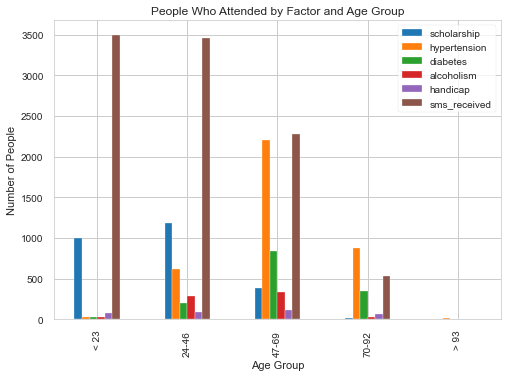

In [37]:
# Let's see the True or False columns in order to know ehich factor can predict if a patient show up.
factors = attended.groupby(['age_bins'])[['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']].sum()
factors.plot.bar()
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.legend()
plt.autoscale()
plt.title("People Who Attended by Factor and Age Group")

> We can see that the sms_received factor is probably the biggest. On second place we have the hipertension factor. 

<a id='conclusions'></a>
## Conclusions

**1: From the 110327 data entries, which is the cleaned data, 20.2% attended to their appointments representing a number of 22278 people who attended.**

**2: Since 22278 People  attended their appointments, they ussually are in the range of age from 0 to 69 years old. Which represents mostly patients less than 23 yearls old, from 24 years old to 46 years old, from 47 years old to 69 years old. We can see also that female gender usually attended to their scheduled appoinments.**

**3: Clearly ir seems that the distribution is more inclined to female gender of people who attended their appointment. Especially in the age within 24-46. On the other hand, we have the male gender where seems to have a distribution inclined for people less than 23 yearls old who attended their apointments.**

**4: We can see that the day which people attended their appointments the most are: Monday, Tuesday, and Wednesday. Noticing that the female gender who attended the most on appointment days as much as scheduled days.**

**5: From all factors in the dataset, notice that patients who received an sms are more likely to attend their appointments. We have in second place the factor of patients whith hypertension and third place patients with the scholarship "Bolsa Familia" program.** 

### Limitations

**1: In the section of question 4, where extracting days from scheduled_day and appointment_day, I tried to get the days using iloc, which gave me some warnings. And there might be a better way doing this.**

